<a href="https://colab.research.google.com/github/ErSangram/New_York_city_taxi_Trip-Time-Prediction/blob/main/NYC_taxi_Trip_Time_Prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

om shree ganeshay namaha !

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
data = pd.read_csv('/content/drive/MyDrive/Alma_projects/NYC Taxi Data.csv')

In [4]:
# Dataset First Look
data.sample(4)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
564911,id2523189,2,2016-01-28 15:08:32,2016-01-28 15:12:47,1,-73.999207,40.734051,-74.003464,40.737560,N,255
547817,id1759960,1,2016-03-09 10:38:38,2016-03-09 10:48:55,1,-74.005402,40.748028,-73.999870,40.734436,N,617
222431,id3608979,1,2016-06-04 14:54:22,2016-06-04 15:14:49,1,-74.001823,40.735439,-74.002876,40.760529,N,1227
120575,id3386508,1,2016-01-05 18:16:10,2016-01-05 18:19:50,1,-73.928627,40.758320,-73.926590,40.760509,N,220


In [5]:
data.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


In [6]:
# Dataset Rows & Columns count
data.shape

(1458644, 11)

In [7]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
len(data[data.duplicated()])

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
columns= list(data.columns)
columns

['id',
 'vendor_id',
 'pickup_datetime',
 'dropoff_datetime',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'store_and_fwd_flag',
 'trip_duration']

In [11]:
# Dataset Describe
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


### Variables Description 

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
a,b = [],[]
for i in list(data.columns):
    a.append(i)
    b.append(data[i].nunique()) 
    
lis = list(zip(a,b))
df = pd.DataFrame(lis, columns = ['column_names','unique values'])
df

,column_names,unique values
0,id,1458644
1,vendor_id,2
2,pickup_datetime,1380222
3,dropoff_datetime,1380377
4,passenger_count,10
5,pickup_longitude,23047
6,pickup_latitude,45245
7,dropoff_longitude,33821
8,dropoff_latitude,62519
9,store_and_fwd_flag,2


## 3. ***Data Wrangling***

In [13]:
#Delect id column from dataset, that will not usefull for our work.
data.drop(['id'],axis=1, inplace= True)

In [14]:
# In this data only few null values are present, that is deleting.
data.dropna().inplace = True

In [15]:
# Importing datetime modules
from datetime import datetime
from datetime import date

In [16]:
#need to canvert pickup_datetime and dropoff_datetime calumn in date format
data['pickup_datetime']= pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])

In [17]:
# Adding a new column as month 
data['month'] = data['pickup_datetime'].dt.month_name()
data['month'].unique()

array(['March', 'June', 'January', 'April', 'May', 'February'],
      dtype=object)

## ***4. Data Vizualization, Experimenting with charts : Understand the relationships between variables***

###**Share of vendors in total trips**

Text(0.5, 1.0, 'vendor_id share in %')

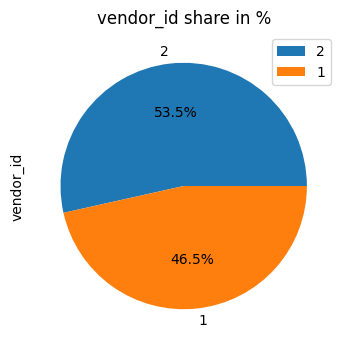

In [18]:
# Plot pie chart for vendor_id
data['vendor_id'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(10,4),fontsize=10)
plt.legend()
plt.title('vendor_id share in %')

###**Trips For Vendor_id With Number of Passenger**

In [19]:
data['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

Text(0.5, 1.0, 'Count of Trips For Vendor_id With Number of Passenger')

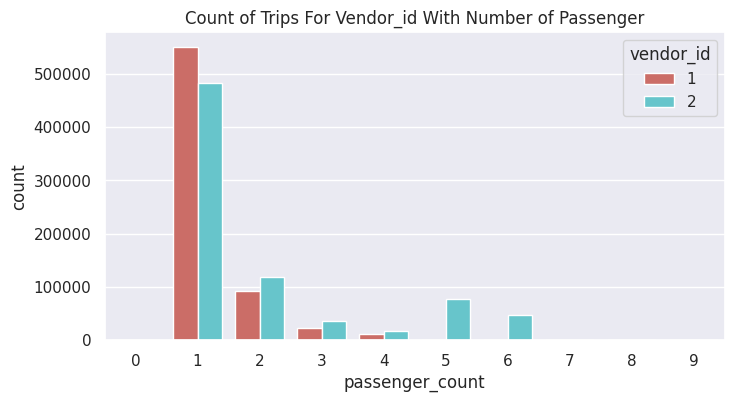

In [20]:
# Chart - 2 
sns.set(color_codes=True)
plt.figure(figsize=(8,4))
sns.countplot(x= 'passenger_count',hue='vendor_id', data=data, palette = 'hls')
plt.title('Count of Trips For Vendor_id With Number of Passenger')

###**Count of Total trips in various month**

Text(0.5, 1.0, 'Monthly Count of Total trips')

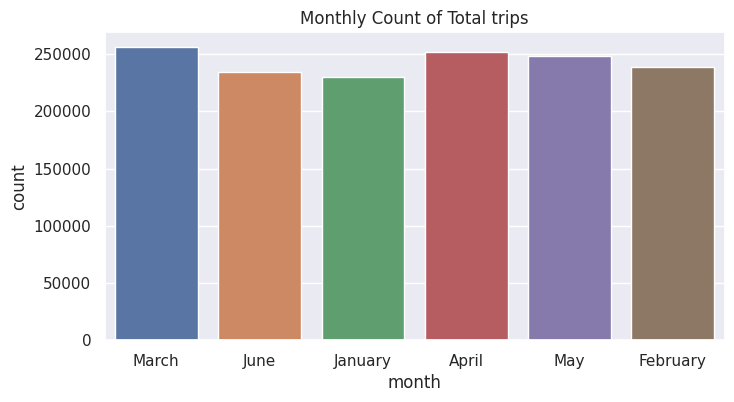

In [21]:
#Count of Total trips in various month
plt.figure(figsize=(8,4))
sns.countplot(x='month', data=data)
plt.title('Monthly Count of Total trips')

##**Data Distribution of Trip duration data column**

In [22]:
import warnings
warnings.filterwarnings("ignore")

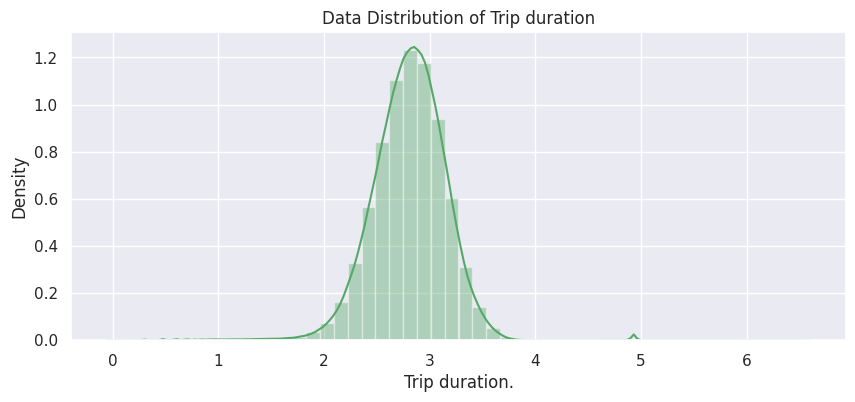

In [23]:
#Distribution plot for trip duration
plt.figure(figsize = (10,4))
sns.distplot(np.log10(data['trip_duration']),color="g")
plt.title('Data Distribution of Trip duration')
plt.xlabel('Trip duration.')
plt.show()

###**Check outlires by ploting Box Plot**

Text(0.5, 1.0, 'Box plot for location columns')

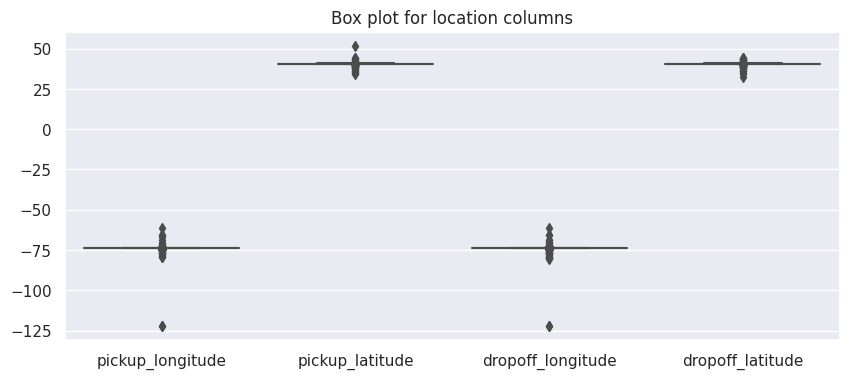

In [24]:
# Check outlires for columns latitude and longitude columns
plt.figure(figsize = (10,4))
sns.boxplot(data = data[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude','dropoff_latitude']])
plt.title('Box plot for location columns')

<Axes: >

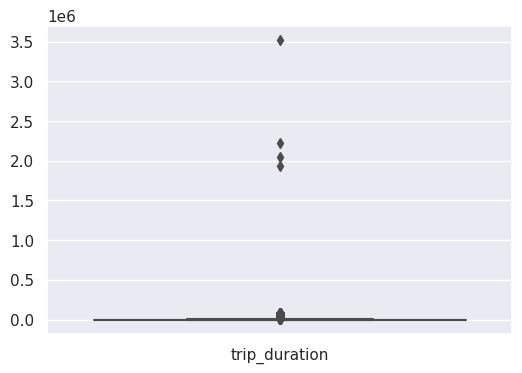

In [25]:
# Check outlires for trip_duration column
plt.figure(figsize = (6,4))
sns.boxplot(data = data[['trip_duration']])

## **5. Data Pre-processing**

###1.Calculate Distance Between Pickup point to Dropoff point

In [26]:
#importing geopy library
from geopy.distance import great_circle

#Creating the function for calculating distance between pickup and dropoff
def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
    start_coordinates=(pickup_lat,pickup_long)
    stop_coordinates=(dropoff_lat,dropoff_long)
 
    return great_circle(start_coordinates,stop_coordinates).km

In [27]:
# Apply cal_distance function on pickup and dropoff data columns
data['distance'] = data.apply(lambda x: cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)


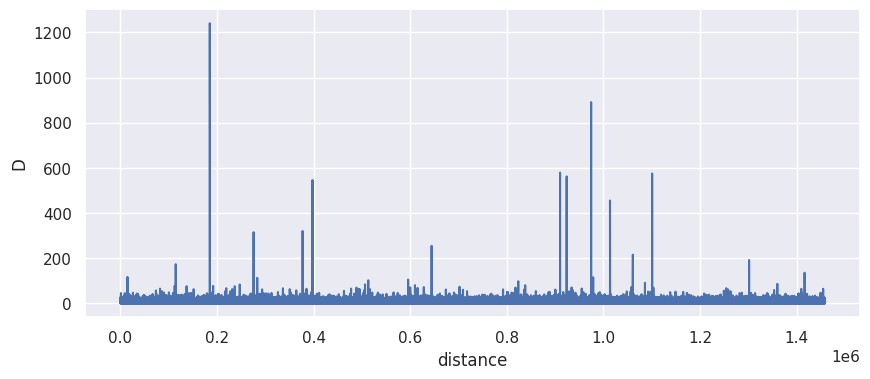

In [28]:
#Distribution plot for New added distance column
plt.figure(figsize = (10,4))
plt.plot(data.distance)
plt.xlabel('distance')
plt.ylabel('D')
plt.show()

<Axes: >

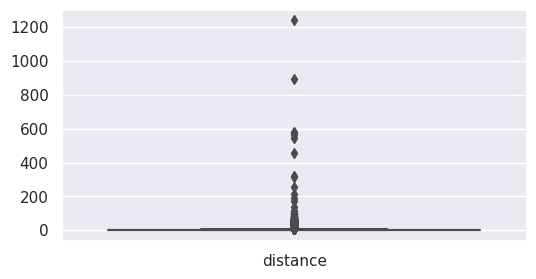

In [29]:
## Check outlires for distance column
plt.figure(figsize = (6,3))
sns.boxplot(data = data[['distance']])

### 2. Handling Outliers

In [30]:
print(data.trip_duration.max())
print(data.trip_duration.min())
print(data.trip_duration.mean())
print(data.trip_duration.std())

3526282
1
959.4922729603659
5237.431724497621


In [31]:
# Handling Outliers & Outlier treatment on trip_duration using The interquartile range (IQR)
Q1 = data.trip_duration.quantile(0.25)
Q3 = data.trip_duration.quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1-0.5*IQR
upper_limit = Q3 +1.5*IQR

In [32]:
#selecting data between limits
data= data[(data.trip_duration > lower_limit) & (data.trip_duration < upper_limit)]

In [33]:
# select non outlier data from the pickup location column
data = data[(data['pickup_longitude'] > -75) & (data['pickup_longitude'] < -73)]
data = data[(data['pickup_latitude']>40) & (data['pickup_latitude'] < 41.5)]

In [34]:
# select non outlier data from the dropoff location column
data = data[(data['dropoff_longitude'] > -75) & (data['dropoff_longitude'] < -73)]
data = data[(data['dropoff_latitude']>40) & (data['dropoff_latitude'] < 41.5)]

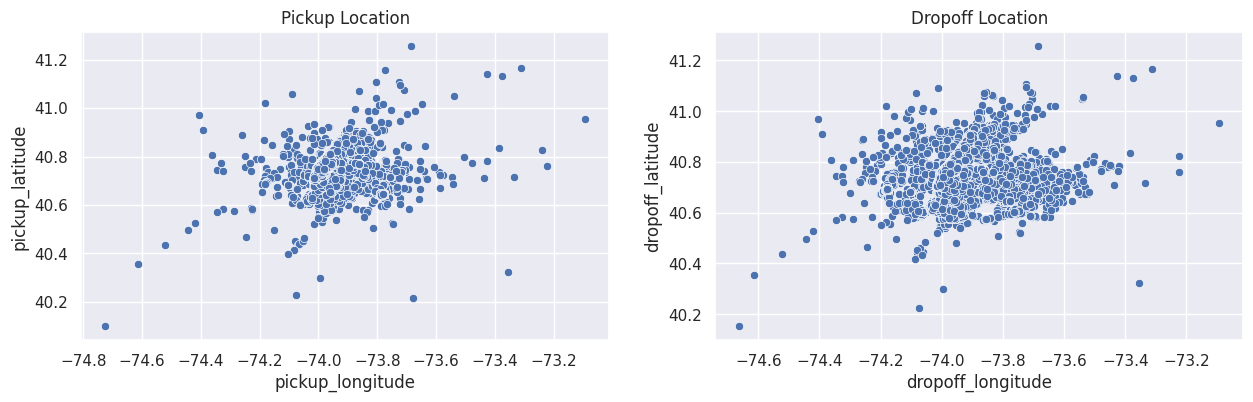

In [35]:
#lets see pickup and dropoff location after removing outlires
figure,(ax3,ax4)=plt.subplots(ncols=2,figsize=(15,4))
ax3.set_title('Pickup Location')
ax=sns.scatterplot(x=data.pickup_longitude,y=data.pickup_latitude,ax=ax3)
ax4.set_title('Dropoff Location')
ax=sns.scatterplot(x=data.dropoff_longitude,y=data.dropoff_latitude,ax=ax4)

In [36]:
# Remove Outliers from Passenger count column by selecting most possible passenger count for taxi, that is between 1 to 5
data = data[(data['passenger_count'] <6) & (data['passenger_count'] !=0)]

In [37]:
# Outlier treatment from distance column by selecting possible distance that means between 0.25 km to 25km.
data = data[(data['distance'] > 0.25) & (data['distance'] <20)]

Text(0.5, 1.0, 'Data Distribution of distance')

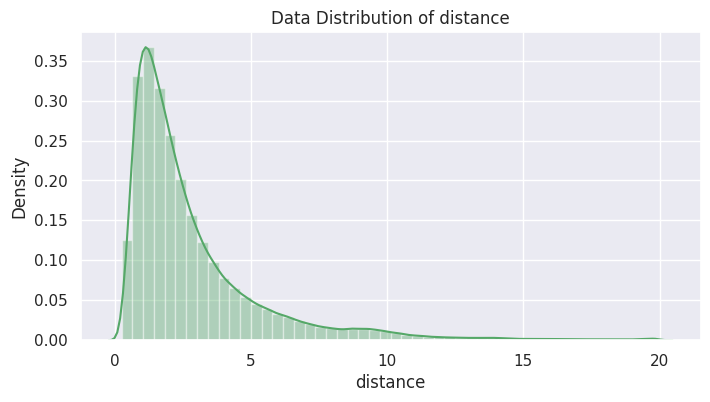

In [38]:
#Distribution plot for distance
plt.figure(figsize=(8,4))
sns.distplot((data['distance']),color="g")
plt.title('Data Distribution of distance')

## **6. Feature Engineering**

### Creating new Features

In [39]:
# create pickup hour and dropoff hour column by extracting hours from date columns
data["pickup_hour"] = data["pickup_datetime"].apply(lambda x: x.hour)
data["dropoff_hour"] = data["dropoff_datetime"].apply(lambda x: x.hour)

<Axes: title={'center': 'Count of trips hourly from Dropoff Days'}, xlabel='dropoff_hour', ylabel='count'>

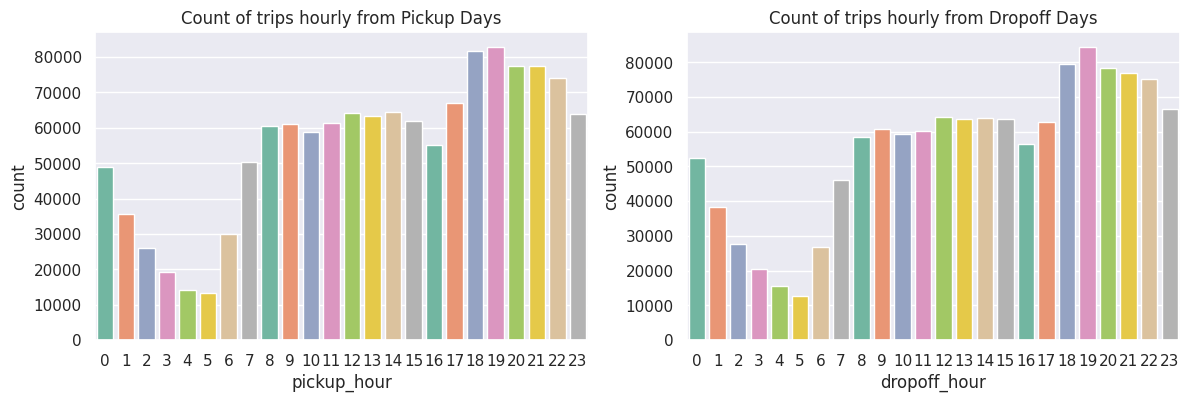

In [40]:
# ploting the subplots 
fig, axs = plt.subplots(1,2, figsize=(14, 4))

# ploting the pickup days against the pickup hour 
axs[0].set_title('Count of trips hourly from Pickup Days')
axs[1].set_title('Count of trips hourly from Dropoff Days')

sns.countplot(x=data['pickup_hour'],palette = ("Set2"),ax=axs[0])
sns.countplot(x=data['dropoff_hour'],palette = ("Set2"),ax=axs[1]) 

In [41]:
# Define function to give time slot according to the time of day

def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,17):
        return 'Afternoon'
    elif x in range(17,23):
        return 'Evening'
    else:
        return 'Late night'

# Apply time_of_day function on pickup hour coumn and create new column as part of day
data['part_of_day']=data['pickup_hour'].apply(time_of_day)

<Axes: title={'center': 'Count of trips for time-slot of day'}, xlabel='part_of_day', ylabel='count'>

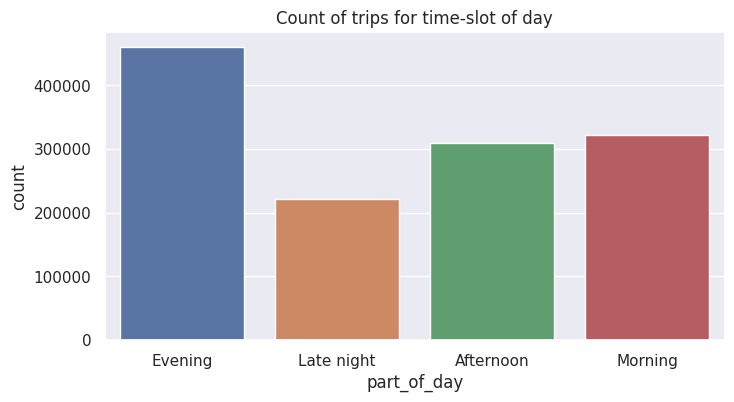

In [42]:
plt.figure(figsize=(8,4))
plt.title('Count of trips for time-slot of day')
sns.countplot(x=data['part_of_day'])

In [43]:
#Avarage time for different parts of day
data.groupby('part_of_day')['trip_duration'].mean()

part_of_day
Afternoon     766.887143
Evening       732.829063
Late night    712.371653
Morning       719.107508
Name: trip_duration, dtype: float64

### 3. Categorical Encoding

In [44]:
data.head(2)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,month,distance,pickup_hour,dropoff_hour,part_of_day
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,March,1.498523,17,17,Evening
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,June,1.805510,0,0,Late night


In [45]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,pickup_hour,dropoff_hour
count,1.313560e+06,1.313560e+06,1.313560e+06,1.313560e+06,1.313560e+06,1.313560e+06,1.313560e+06,1.313560e+06,1.313560e+06,1.313560e+06
mean,1.517724e+00,1.513354e+00,-7.397733e+01,4.075253e+01,-7.397539e+01,4.075308e+01,7.340391e+02,2.877636e+00,1.360698e+01,1.358971e+01
std,4.996860e-01,1.057093e+00,2.821977e-02,2.473038e-02,2.896830e-02,2.939725e-02,4.410441e+02,2.642384e+00,6.450973e+00,6.525228e+00
min,1.000000e+00,1.000000e+00,-7.472672e+01,4.009979e+01,-7.466313e+01,4.015374e+01,5.900000e+01,2.500152e-01,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399208e+01,4.073835e+01,-7.399142e+01,4.073721e+01,3.900000e+02,1.225627e+00,9.000000e+00,9.000000e+00
50%,2.000000e+00,1.000000e+00,-7.398207e+01,4.075446e+01,-7.398005e+01,4.075490e+01,6.350000e+02,2.014386e+00,1.400000e+01,1.400000e+01
75%,2.000000e+00,2.000000e+00,-7.396873e+01,4.076830e+01,-7.396417e+01,4.077008e+01,9.900000e+02,3.494621e+00,1.900000e+01,1.900000e+01
max,2.000000e+00,5.000000e+00,-7.323800e+01,4.115737e+01,-7.322501e+01,4.107109e+01,2.091000e+03,1.999992e+01,2.300000e+01,2.300000e+01


In [46]:
numeric_features = ['passenger_count','pickup_longitude', 'pickup_latitude', 'dropoff_longitude','dropoff_latitude', 'distance']

In [48]:
# data.drop(['dropoff_hour'])

In [49]:
numeric_features = data.describe().columns

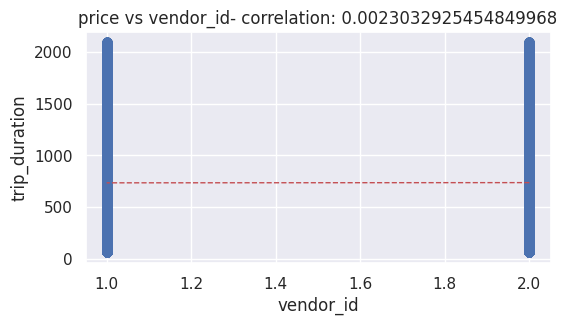

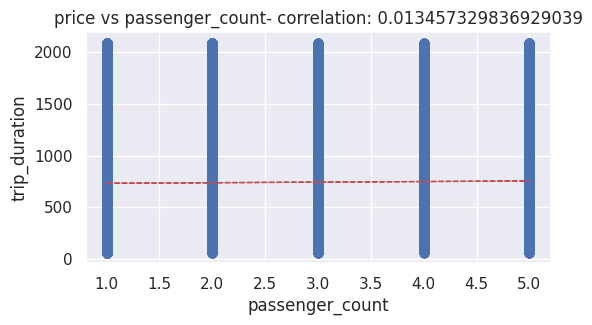

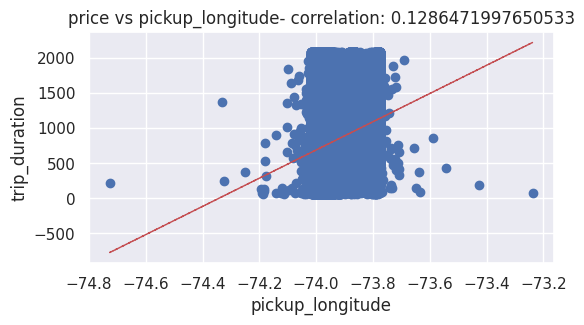

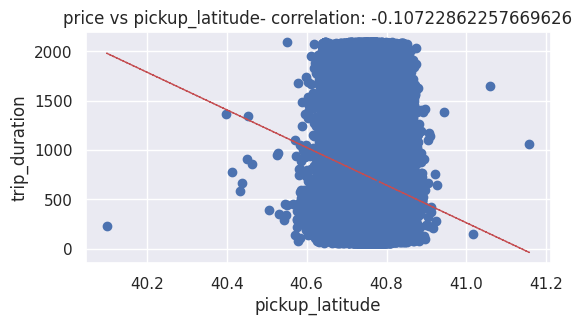

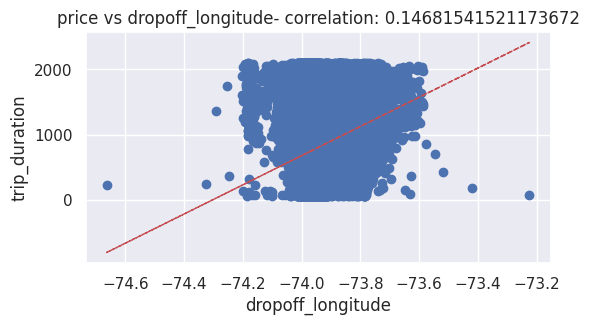

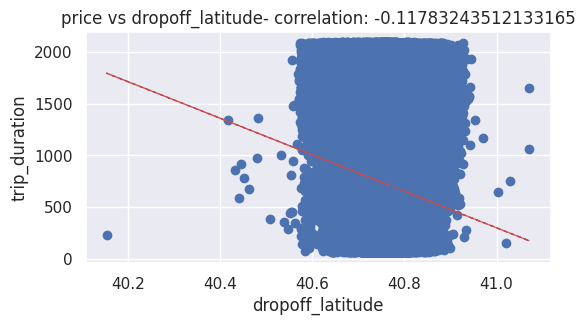

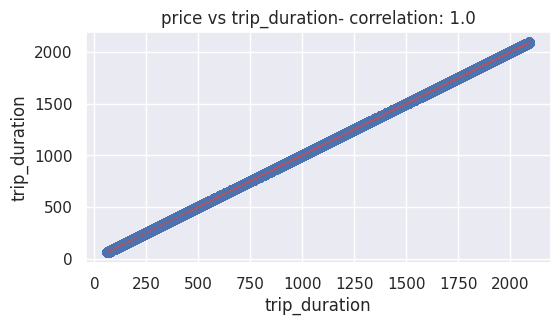

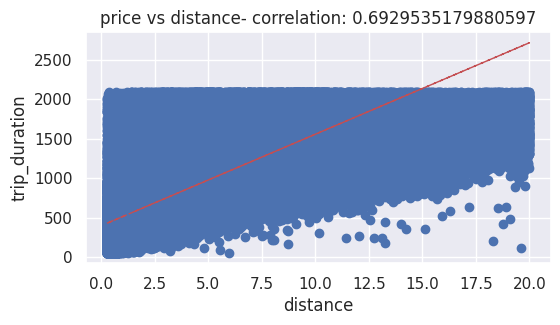

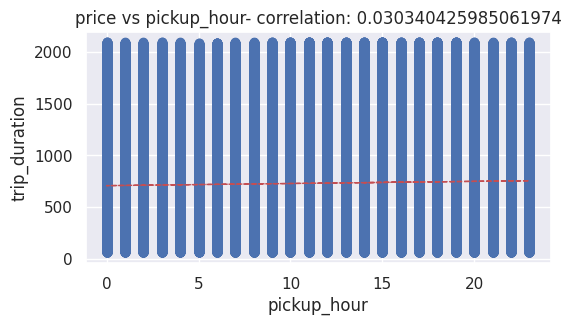

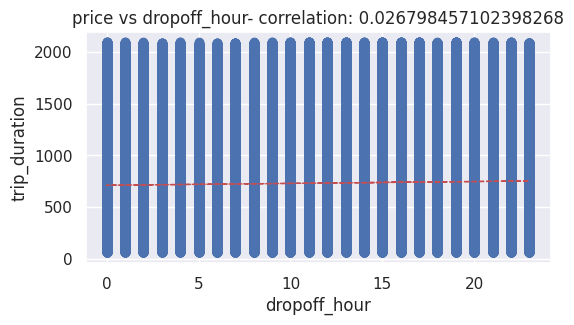

In [50]:
for col in numeric_features[:]:
    fig = plt.figure(figsize=(6, 3))
    ax = fig.gca()
    feature = data[col]
    label = data['trip_duration']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('trip_duration')
    ax.set_title('price vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(data[col], data['trip_duration'], 1)
    y_hat = np.poly1d(z)(data[col])

    plt.plot(data[col], y_hat, "r--", lw=1)

plt.show()

In [51]:
data.shape

(1313560, 15)

<Axes: >

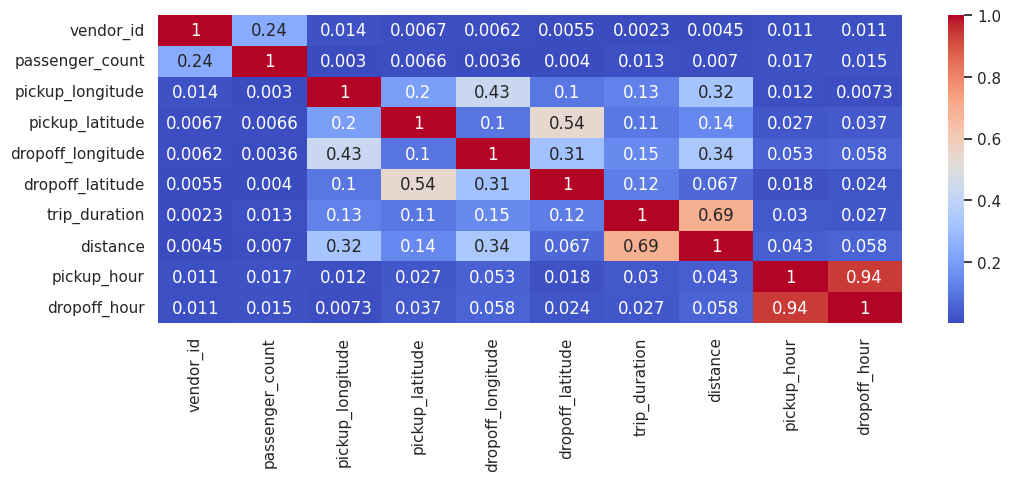

In [52]:
 ## Correlation
plt.figure(figsize=(12,4))
correlation = data.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [54]:
calc_vif(data[[i for i in data.describe().columns if i not in ['Sales']]])

,variables,VIF
0,vendor_id,1.084180e+01
1,passenger_count,3.233942e+00
2,pickup_longitude,7.074135e+06
3,pickup_latitude,3.686413e+06
4,dropoff_longitude,6.962917e+06
5,dropoff_latitude,2.843407e+06
6,trip_duration,7.492968e+00
7,distance,4.387721e+00
8,pickup_hour,4.687362e+01
9,dropoff_hour,4.608915e+01


In [55]:
'vendor_id','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'

('vendor_id',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude')

In [56]:
# Data for all the independent variables
X = data.drop(labels=['pickup_datetime','dropoff_datetime','store_and_fwd_flag','month','trip_duration','dropoff_hour','part_of_day'],axis=1)

Y = data['trip_duration']

In [57]:
data.head(1)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,month,distance,pickup_hour,dropoff_hour,part_of_day
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.96463,40.765602,N,455,March,1.498523,17,17,Evening


In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25, random_state=1)

In [59]:
X_train.shape, X_test.shape

((985170, 8), (328390, 8))

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train =scaler.fit_transform(X_train)
X_test =scaler.fit_transform(X_test)

In [61]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
linear_reg =  LinearRegression()

#Aplly model on train dataset
linear_reg.fit(X_train, Y_train)

LinearRegression()

In [62]:
#model score on train dataset
linear_reg.score(X_train, Y_train)

0.5029053866709862

In [63]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [64]:
#predicted value of train and test dataset
y_pred_train = linear_reg.predict(X_train)
y_pred_test = linear_reg.predict(X_test)
#Train Data Evaluation Metrics 
lr_train_mse  = mean_squared_error((Y_train), (y_pred_train))
print("Train MSE :" , lr_train_mse)

lr_train_r2 = r2_score((Y_train), (y_pred_train))
print("Train R2 :" ,lr_train_r2) 

lr_train_r2_ = 1-(1-r2_score((Y_train), (y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ",lr_train_r2_)

Train MSE : 96771.90936687645
Train R2 : 0.5029053866709862
Train Adjusted R2 :  0.5029013500141284


In [65]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.1 , max_iter= 3000)
lasso.fit(X_train, Y_train)

Lasso(alpha=0.1, max_iter=3000)

In [66]:
lasso.score(X_train, Y_train)

0.5029047619903425

In [67]:
y_pred_l = lasso.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(Y_test), 10**(y_pred_l))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(Y_test), 10**(y_pred_l))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(Y_test), 10**(y_pred_l)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

In [73]:
# r2 = r2_score(10**(Y_test), 10**(y_pred_l))

ValueError: ignored

In [70]:
# import random forest 
from sklearn.ensemble import RandomForestRegressor

In [71]:
# Training the random forest regresor 

regr1 = RandomForestRegressor(max_features='sqrt',min_samples_leaf=4,min_samples_split=3,n_estimators=40, n_jobs=-1)
regr1.fit(X_train, Y_train)

RandomForestRegressor(max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=3, n_estimators=40, n_jobs=-1)

In [72]:
# R2 score of the random forest
Y_pred_r = regr1.predict(X_train)
r2_score(Y_train, Y_pred_r)

0.860695563050377

In [74]:
#predicted value of train and test dataset
y_pred_train2 = regr1.predict(X_train)
y_pred_test2 = regr1.predict(X_test)
#Train Data Evaluation Metrics 
lr_train_mse  = mean_squared_error((Y_train), (y_pred_train2))
print("Train MSE :" , lr_train_mse)

lr_train_r2 = r2_score((Y_train), (y_pred_train2))
print("Train R2 :" ,lr_train_r2) 

lr_train_r2_ = 1-(1-r2_score((Y_train), (y_pred_train2)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ",lr_train_r2_)

Train MSE : 27119.095611623776
Train R2 : 0.860695563050377
Train Adjusted R2 :  0.8606944318286827
